In [1]:
import pandas as pd
from glob import glob

In [2]:
partner_ids = pd.read_csv('partner_unitids.csv')['UNITID']

In [3]:
def clean_academic_year(fname):
    return fname.replace('CollegeScorecard_Raw_Data/MERGED', '').replace('_PP.csv', '').replace('_', '-')

In [4]:
all_dfs = []
for fname in glob('CollegeScorecard_Raw_Data/*.csv'):
    df = pd.read_csv(fname, low_memory=False)
    df = df[df.UNITID.isin(partner_ids)]
    orig_columns = list(df.columns)
    df['ACADYR'] = clean_academic_year(fname)
    df = df[['ACADYR'] + orig_columns]
    all_dfs.append(df)

In [5]:
all_partner_data = pd.concat(all_dfs, ignore_index=True, copy=True)

In [6]:
x = all_partner_data[['UNITID', 'INSTNM']]

In [7]:
YALE_ID = 130794
yale = all_partner_data.loc[all_partner_data.UNITID == YALE_ID, ['ACADYR', 'UNITID', 'PCTPELL', 'PCTFLOAN', 'PELL_DEBT_MDN', 'FIRST_GEN', 'PELL_EVER']]

In [8]:
yale.head(20)

,ACADYR,UNITID,PCTPELL,PCTFLOAN,PELL_DEBT_MDN,FIRST_GEN,PELL_EVER
7,1996-97,130794,NaN,NaN,NaN,NaN,NaN
46,1997-98,130794,NaN,NaN,16102,0.1418685121,0.3080851064
85,1998-99,130794,NaN,NaN,16110,0.1394275162,0.3081761006
124,1999-00,130794,NaN,NaN,17125,0.1452145215,0.2727272727
163,2000-01,130794,NaN,NaN,17125,0.1442598187,0.25
202,2001-02,130794,NaN,NaN,17125,0.1431623932,0.2513850416
241,2002-03,130794,NaN,NaN,15525,0.1573448064,0.2341696535
280,2003-04,130794,NaN,NaN,13853.5,0.1438164522,0.1972899729
319,2004-05,130794,NaN,NaN,13336,0.1322128852,0.1948192121
358,2005-06,130794,NaN,NaN,13095,0.1430281269,0.2090069284


In [9]:
all_partner_data.sort_values(['ACADYR', 'UNITID']).to_excel('PartnerScoreCardData_1996-2016.xlsx', index=False)

In [52]:
pct_pell = all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='PCTPELL')

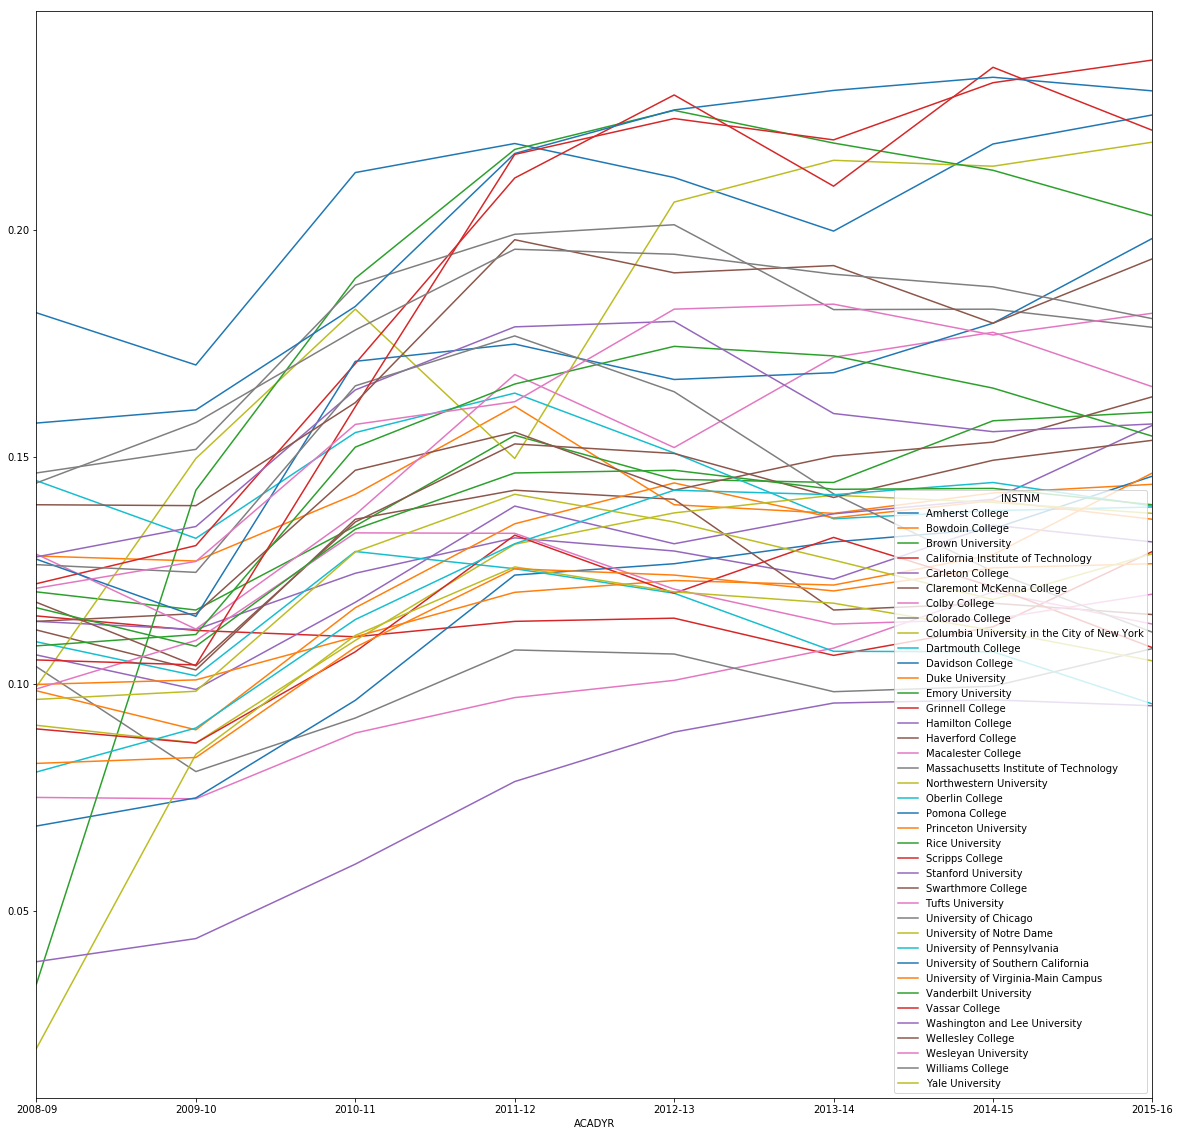

In [77]:
%matplotlib inline
pct_pell.loc['2008-09':,:].plot(figsize=(20,20))

In [57]:
all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='FIRST_GEN').tail()
# .plot(figsize=(20,20)

INSTNM,Amherst College,Bowdoin College,Brown University,California Institute of Technology,Carleton College,Claremont McKenna College,Colby College,Colorado College,Columbia University in the City of New York,Dartmouth College,...,University of Pennsylvania,University of Southern California,University of Virginia-Main Campus,Vanderbilt University,Vassar College,Washington and Lee University,Wellesley College,Wesleyan University,Williams College,Yale University
ACADYR,,,,,,,,,,,,,,,,,,,,,
2011-12,0.2089552239,0.1329923274,0.148295004,PrivacySuppressed,0.1183574879,0.131147541,0.1346704871,PrivacySuppressed,0.1981009927,0.1260245902,...,0.1764199656,0.2170997485,0.1655589124,0.1381789137,0.1269230769,0.0732394366,0.1351351351,0.1834733894,0.1835051546,0.1843876178
2012-13,0.2117647059,0.1689373297,0.1632329635,PrivacySuppressed,0.1026252983,PrivacySuppressed,0.1538461538,PrivacySuppressed,0.1950904393,0.1145510836,...,0.1721854305,0.2244983278,0.1719559585,0.1241987179,0.1332417582,0.1114285714,0.1426024955,0.1874145007,0.1750972763,0.2054208274
2013-14,0.2234042553,0.1786743516,0.1824534161,PrivacySuppressed,0.1060948081,PrivacySuppressed,0.1568047337,0.1253405995,0.198771391,0.125388601,...,0.1761775362,0.2276159655,0.1659014386,0.1153526971,0.138483965,PrivacySuppressed,0.1584327087,0.1664050235,0.1715481172,0.1952247191
2014-15,0.2080200501,0.167192429,0.1812450749,PrivacySuppressed,0.1294964029,PrivacySuppressed,0.1089108911,0.1260744986,0.224665392,0.1490236382,...,0.1833161689,0.2261574074,0.1651570048,0.121350365,0.1408045977,PrivacySuppressed,0.1384892086,0.1869918699,0.1704035874,0.2142857143
2015-16,0.1965317919,0.1608391608,0.172173913,PrivacySuppressed,0.1623931624,PrivacySuppressed,0.082437276,0.1543026706,0.2533883324,0.1711809317,...,0.1869722557,0.2435483871,0.1612903226,0.1336787565,0.1572871573,PrivacySuppressed,0.1473684211,0.2105263158,0.2014388489,0.2526475038


In [92]:
df = (all_partner_data
 .pivot(index='ACADYR', columns='INSTNM', values='PCIP14')
 .replace('PrivacySuppressed', pd.np.nan)
 .dropna(axis=1, how='all')
 .dropna(axis=0, how='all')
 )
df.convert_objects(convert_numeric=True) #.plot(figsize=(20,20), legend=True)


/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


INSTNM,Amherst College,Bowdoin College,Brown University,California Institute of Technology,Carleton College,Claremont McKenna College,Colby College,Colorado College,Columbia University in the City of New York,Dartmouth College,...,University of Pennsylvania,University of Southern California,University of Virginia-Main Campus,Vanderbilt University,Vassar College,Washington and Lee University,Wellesley College,Wesleyan University,Williams College,Yale University
ACADYR,,,,,,,,,,,,,,,,,,,,,
1996-97,0.0,0.0,0.0497,0.5536,0.0,0.0251,0.0,0.0,0.1616,0.1253,...,0.0889,0.0770,0.0969,0.1782,0.0,0.0160,0.0,0.0,0.0,0.0271
1997-98,0.0,0.0,0.0652,0.5446,0.0,0.0265,0.0,0.0,0.1599,0.1100,...,0.0940,NaN,0.1013,0.1823,0.0,0.0133,0.0,0.0,0.0,0.0262
1998-99,0.0,0.0,0.0460,0.5297,0.0,0.0084,0.0,0.0,0.1633,0.0912,...,0.0893,0.0824,0.0949,0.2036,0.0,0.0222,0.0,0.0,0.0,0.0179
1999-00,0.0,0.0,0.0743,0.5657,0.0,0.0216,0.0,0.0,0.1615,0.0702,...,0.1020,0.0768,0.0949,0.2090,0.0,0.0222,0.0,0.0,0.0,0.0233
2000-01,0.0,0.0,0.0542,0.4752,0.0,0.0078,0.0,0.0,0.1521,0.0568,...,0.0990,0.0847,0.0971,0.1885,0.0,0.0123,0.0,0.0,0.0,0.0302
2001-02,0.0,0.0,0.0540,0.5000,0.0,0.0000,0.0,0.0,0.1579,0.0597,...,0.0990,0.0691,0.1031,0.1636,0.0,0.0168,0.0,0.0,0.0,0.0356
2002-03,0.0,0.0,0.0478,0.4578,0.0,0.0000,0.0,0.0,0.1394,0.0590,...,0.1065,0.0678,0.1040,0.1802,0.0,0.0142,0.0,0.0,0.0,0.0350
2003-04,0.0,0.0,0.0447,0.5000,0.0,0.0000,0.0,0.0,0.1431,0.0627,...,0.1085,0.0775,0.1129,0.1585,0.0,0.0191,0.0,0.0,0.0,0.0326
2004-05,0.0,0.0,0.0490,0.3894,0.0,0.0000,0.0,0.0,0.1381,0.0602,...,0.0860,0.0695,0.1082,0.1770,0.0,0.0075,0.0,0.0,0.0,0.0358


In [99]:
# Undergrad enrollment
all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='UGDS')

INSTNM,Amherst College,Bowdoin College,Brown University,California Institute of Technology,Carleton College,Claremont McKenna College,Colby College,Colorado College,Columbia University in the City of New York,Dartmouth College,...,University of Pennsylvania,University of Southern California,University of Virginia-Main Campus,Vanderbilt University,Vassar College,Washington and Lee University,Wellesley College,Wesleyan University,Williams College,Yale University
ACADYR,,,,,,,,,,,,,,,,,,,,,
1996-97,1598.0,1581.0,5729.0,882.0,1867.0,954.0,1764.0,1915.0,5845.0,3848.0,...,11508.0,14586.0,12017.0,5780.0,2283.0,1645.0,2249.0,2710.0,1961.0,5366.0
1997-98,1649.0,1597.0,5751.0,904.0,1858.0,979.0,1753.0,1999.0,6334.0,3932.0,...,11404.0,14782.0,12281.0,5829.0,2360.0,1681.0,2245.0,2764.0,1970.0,5355.0
1998-99,1651.0,1573.0,5810.0,901.0,1856.0,1024.0,1823.0,1955.0,6401.0,3978.0,...,11644.0,15218.0,12426.0,5660.0,2349.0,1666.0,2244.0,2728.0,2010.0,5294.0
1999-00,1664.0,1600.0,5868.0,907.0,1880.0,1043.0,1762.0,1935.0,6682.0,3998.0,...,11780.0,15370.0,12467.0,5752.0,2298.0,1706.0,2290.0,2734.0,2052.0,5266.0
2000-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02,1631.0,1623.0,5766.0,942.0,1922.0,1044.0,1809.0,1455.0,6867.0,4055.0,...,11781.0,15900.0,12639.0,6044.0,2399.0,1706.0,2262.0,2769.0,1937.0,5282.0
2002-03,1618.0,1655.0,5806.0,939.0,1924.0,1099.0,1829.0,1902.0,6988.0,4053.0,...,11946.0,16021.0,12815.0,6097.0,2436.0,1696.0,2275.0,2721.0,1985.0,5302.0
2003-04,1618.0,1636.0,5730.0,891.0,1927.0,1137.0,1768.0,1929.0,7134.0,4006.0,...,11027.0,16240.0,12979.0,6243.0,2416.0,1734.0,2291.0,2692.0,1974.0,5287.0
2004-05,1640.0,1665.0,5768.0,896.0,1932.0,1124.0,1820.0,1994.0,7233.0,3998.0,...,10854.0,16271.0,13231.0,6231.0,2428.0,1754.0,2195.0,2755.0,1931.0,5268.0


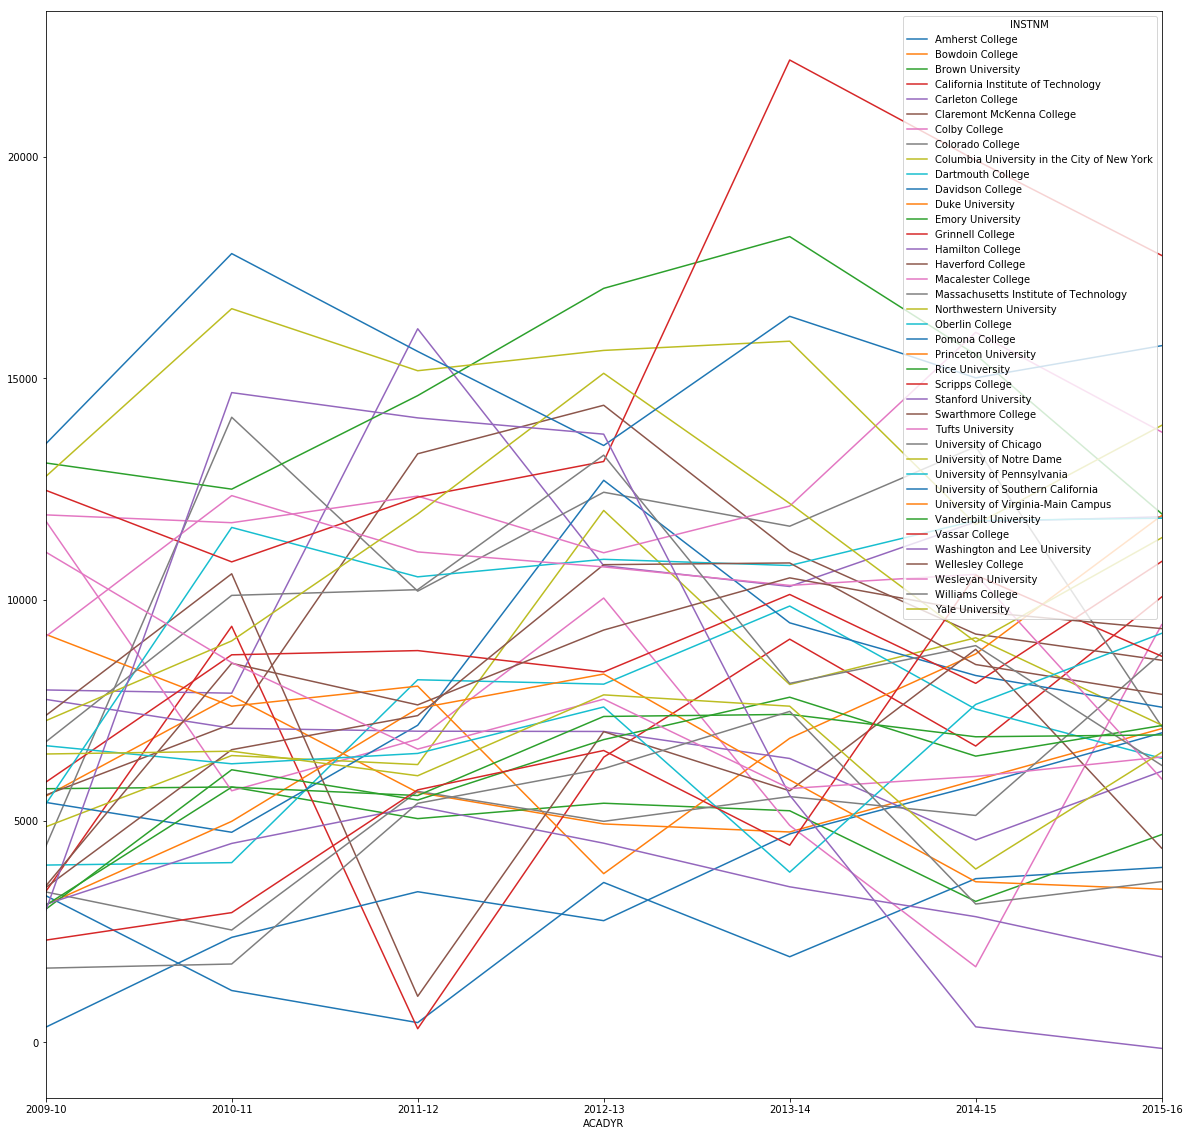

In [104]:
# AVG Net price private, income < 30K
all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='NPT41_PRIV').dropna(how='all').plot(figsize=(20,20))

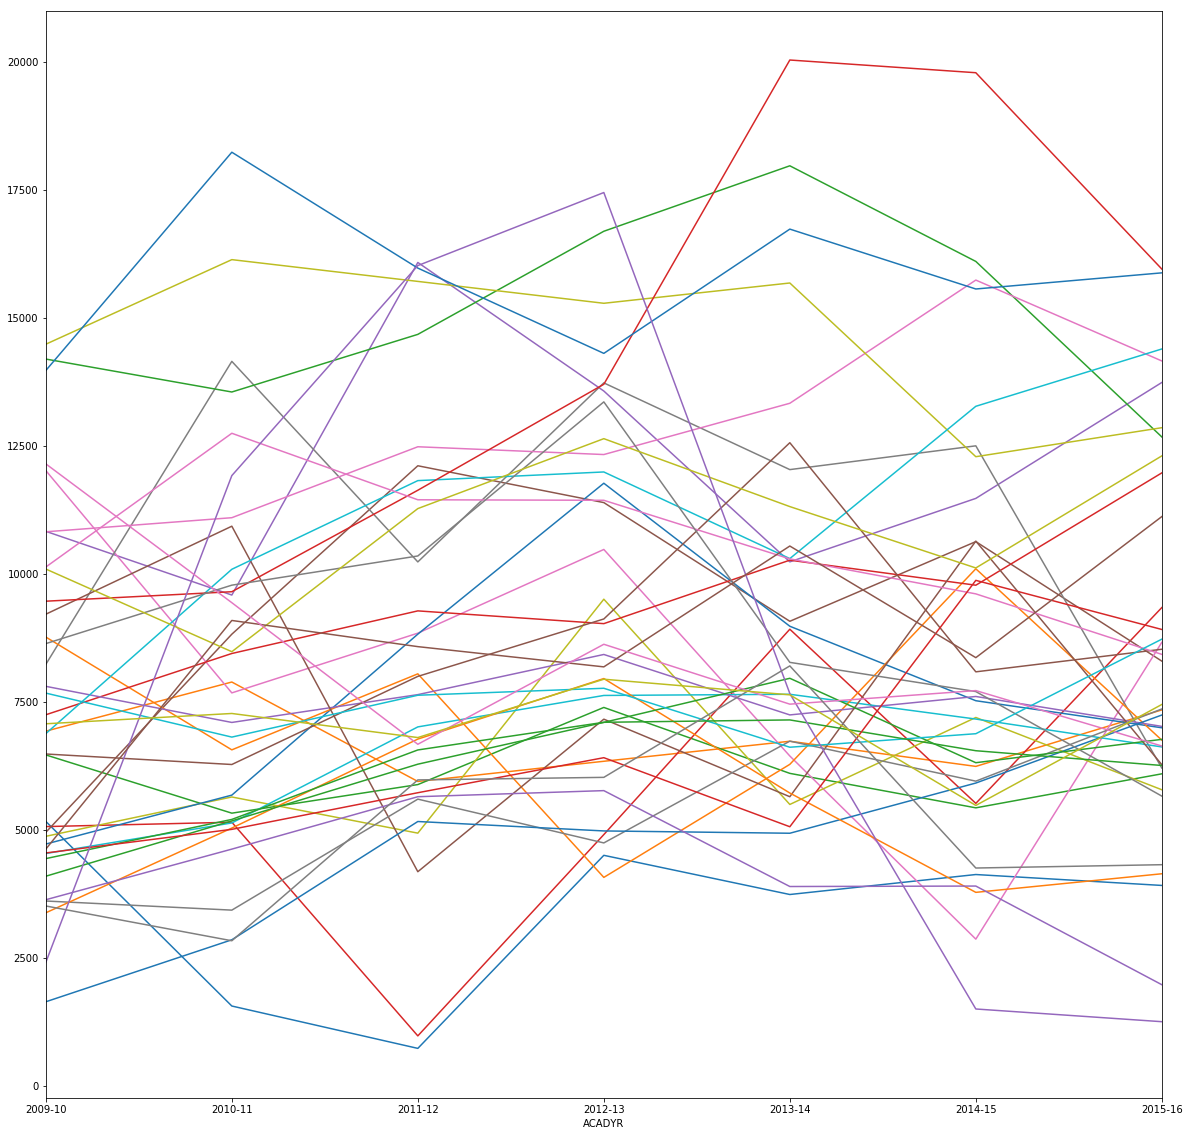

In [107]:
# AVG Net price private, income < 48K
all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='NPT4_048_PRIV').dropna(how='all').plot(figsize=(20,20), legend=False)

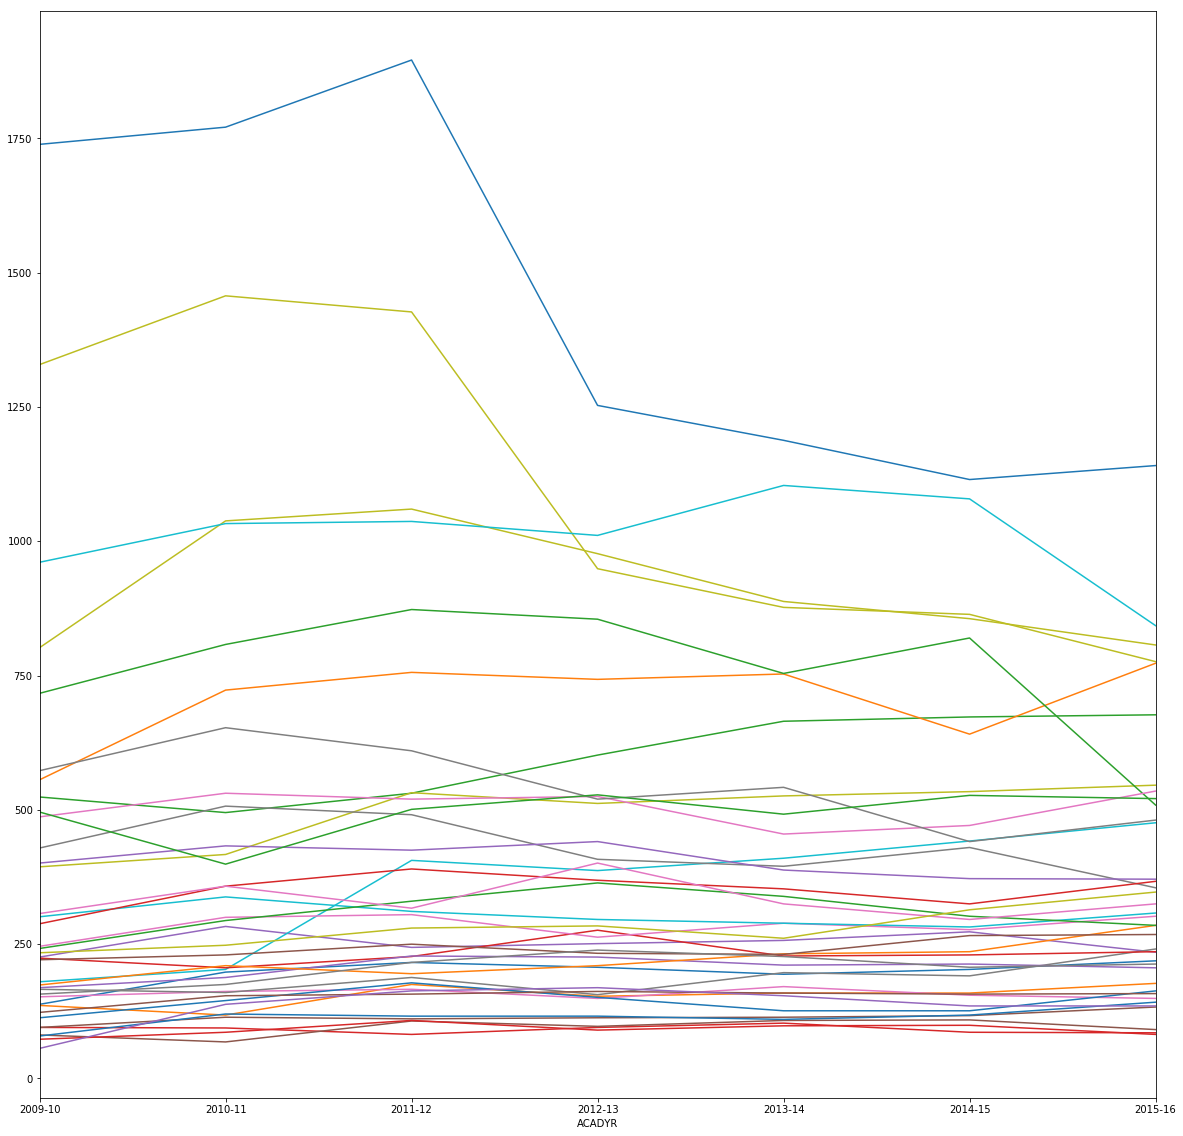

In [108]:
# AVG Net price private, income < 48K
all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='NUM4_PRIV').dropna(how='all').plot(figsize=(20,20), legend=False)

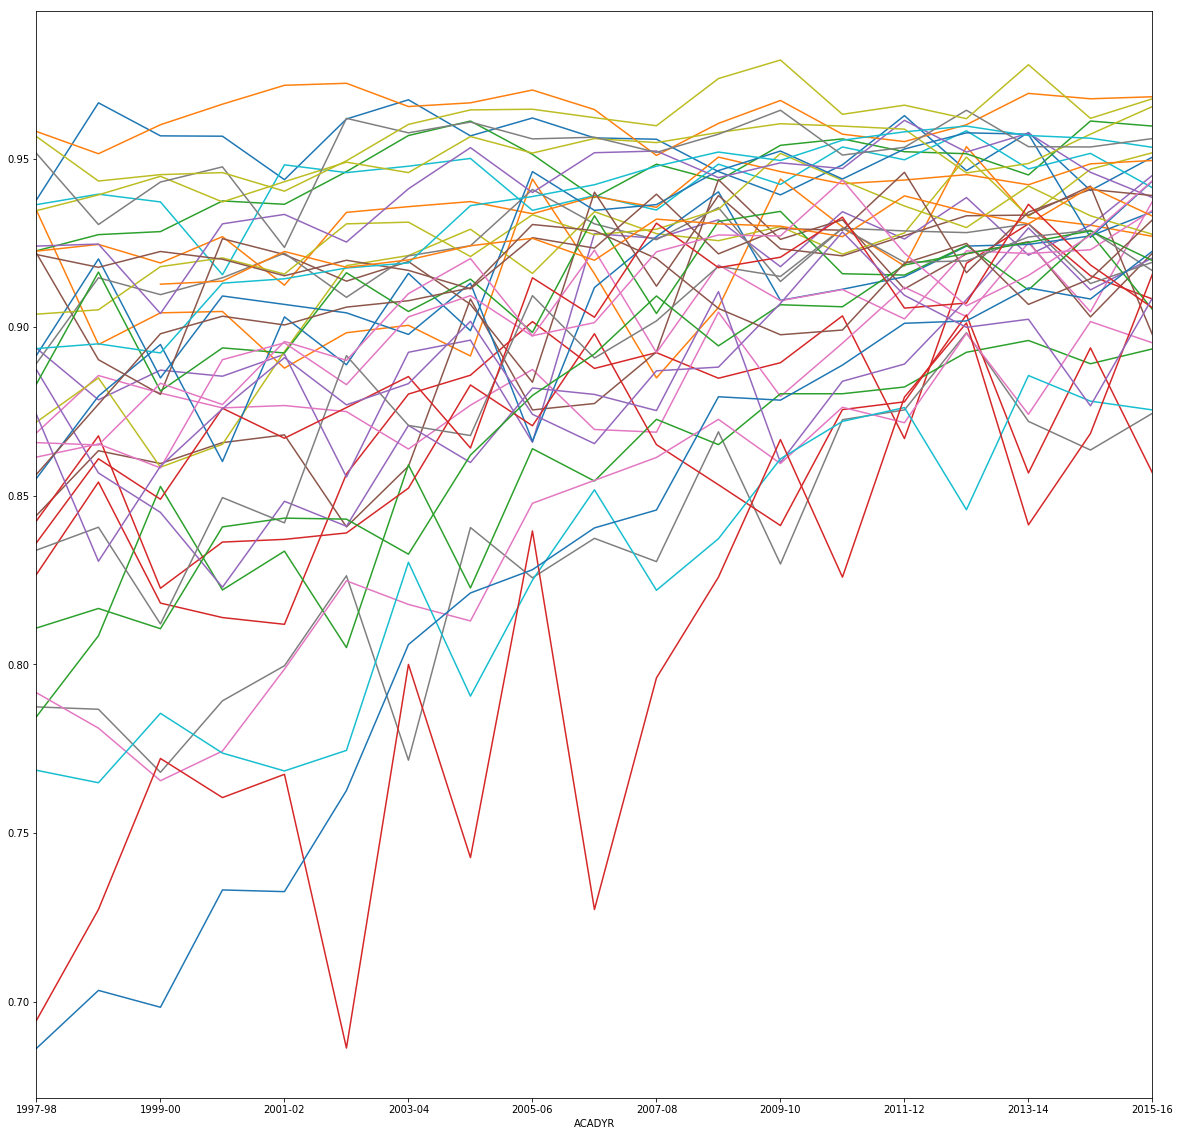

In [109]:
# AVG Net price private, income < 48K
all_partner_data.pivot(index='ACADYR', columns='INSTNM', values='C150_4').dropna(how='all').plot(figsize=(20,20), legend=False)